# Update Webmaps
Short snippets for updating webmaps!

In [12]:
import json
from arcgis.gis import GIS, Item

In [13]:
gis = GIS(username="mpayson_startups")

Enter password:  ········


## Initialization

<Item title:"Visibility Toggle Demo Map" type:Web Map owner:mpayson_startups>
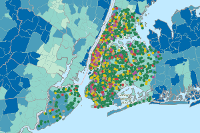

In [14]:
# Get map item and fetch the JSON representation
map_item = Item(gis, 'b6fea172e4c94e38954cca45dbdf660d')
map_item

In [15]:
map_dict = dict(map_item.get_data())

## Change basemap

Replaces a webmap basemap with **[an existing basemap](https://www.arcgis.com/home/group.html?id=30de8da907d240a0bccd5ad3ff25ef4a&view=list&focus=maps-webmaps#content)** in ArcGIS Online.

In [16]:
# colored pencil basemap
bm_item = Item(gis, '826498a48bd0424f9c9315214f2165d4')

map_dict = dict(map_item.get_data())
bm_dict = dict(bm_item.get_data())

map_dict['baseMap'] = bm_dict['baseMap']

map_item.update(data=json.dumps(map_dict))

True

## Change layer visibility
Controls whether a specific layer is visible when the map first loads

In [17]:
lyr_i = [
    i for i,l in enumerate(map_dict['operationalLayers'])
    if l['id'] == 'USA_Consumer_Expenditures_1_2019_9993'
][0]

is_vis = not map_dict['operationalLayers'][lyr_i]['visibility']
map_dict['operationalLayers'][lyr_i]['visibility'] = is_vis

map_item.update(data=json.dumps(map_dict))

True

## Change layer title & id
Updates a specific layer title & id. **NOTE** Esri configurable apps use the ID to configure & define a layers behavior, so if you change the ID it will likely break any pre-created apps.

In [18]:
lyr_dict = map_dict['operationalLayers'][0]
update_lyr_dict = {
    **lyr_dict,
    'title': 'Some cool demographic data',
    'id': 'my_well_known_id'
}
map_dict['operationalLayers'][0] = update_lyr_dict

map_item.update(data=json.dumps(map_dict))

True